In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
RabiX0 = np.loadtxt("RabiX.txt")
RabiXY0 = np.loadtxt("RabiXY.txt")

In [3]:
RabiX = (1 + np.cos(RabiX0)) / 2
RabiXY = (1 + np.cos(RabiXY0)) / 2

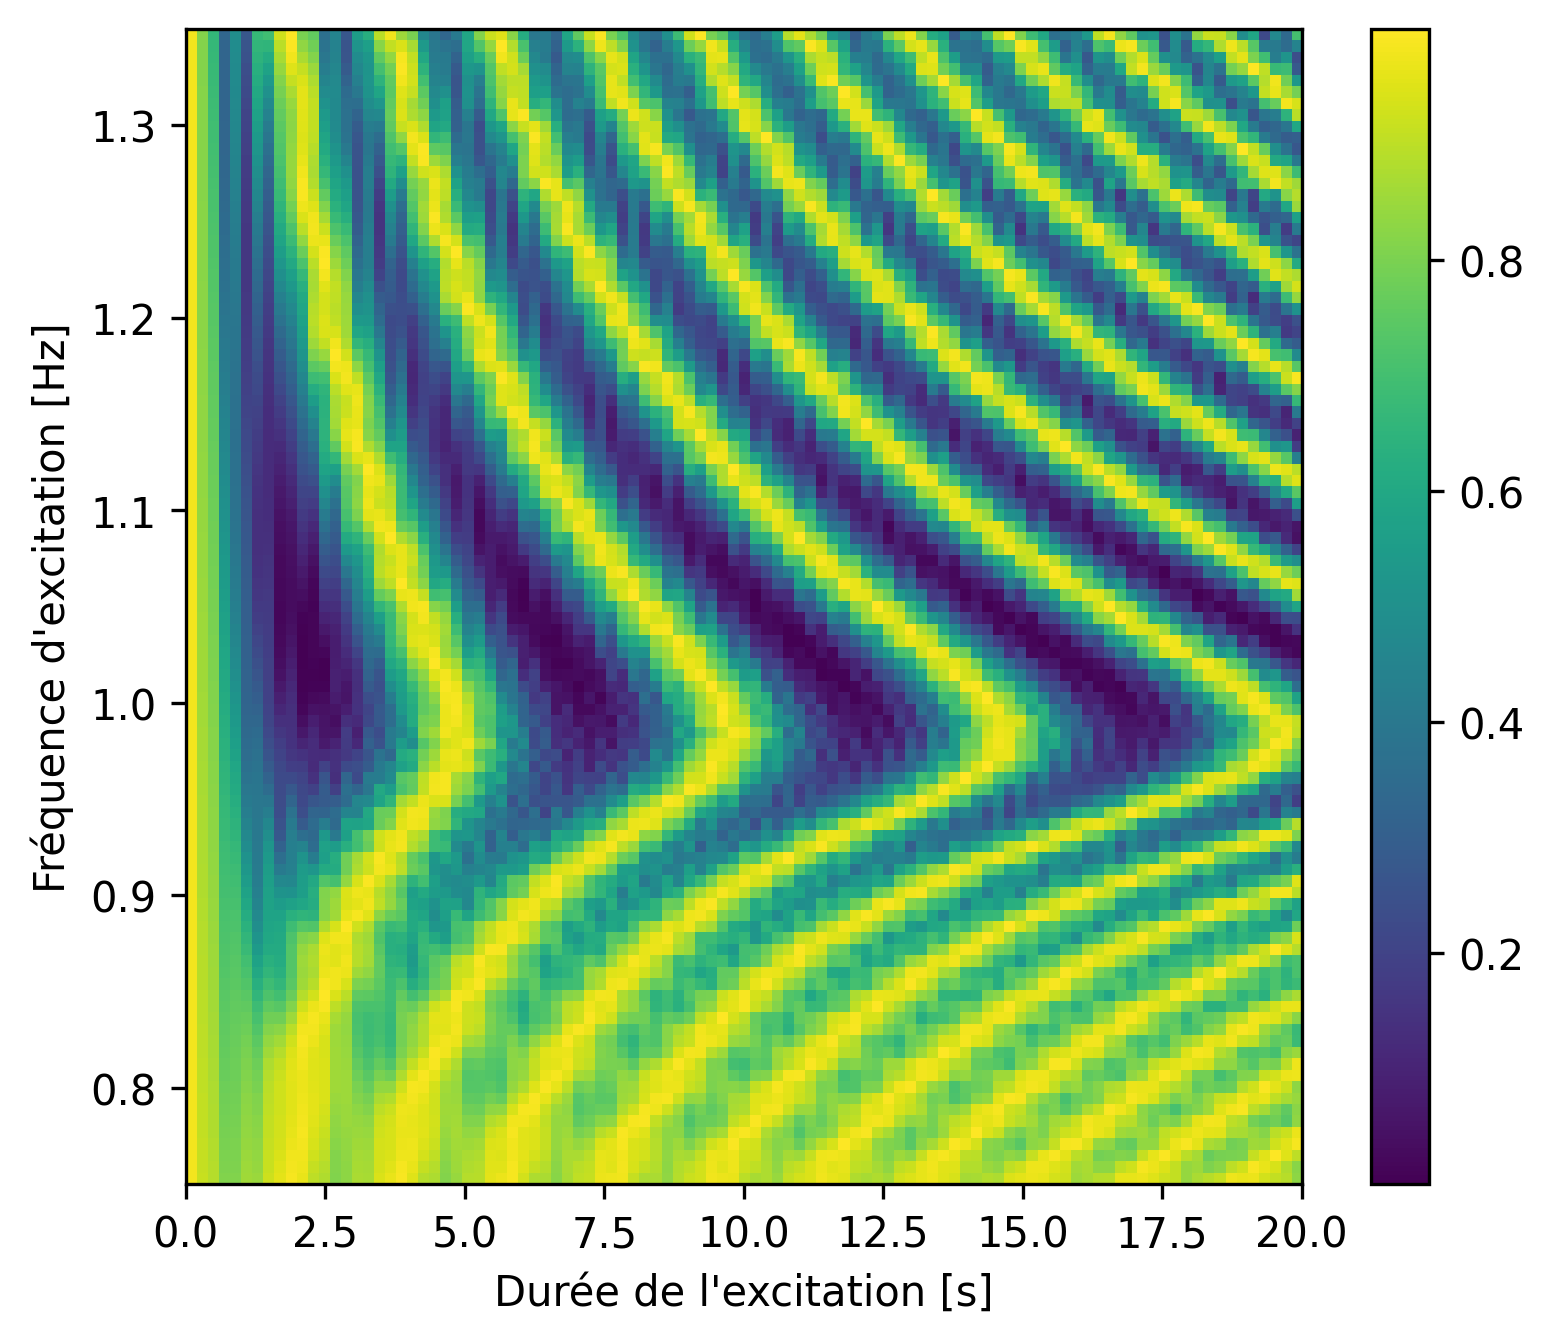

In [4]:
plt.figure(figsize=(6, 5), dpi = 300)
plt.imshow(RabiX, origin = "lower", extent=[0, 20, 0.75, 1.35], aspect="auto")
plt.xlabel("Durée de l'excitation [s]")
plt.ylabel("Fréquence d'excitation [Hz]")
plt.colorbar()
plt.savefig("RabiX_plt.png")
plt.show()


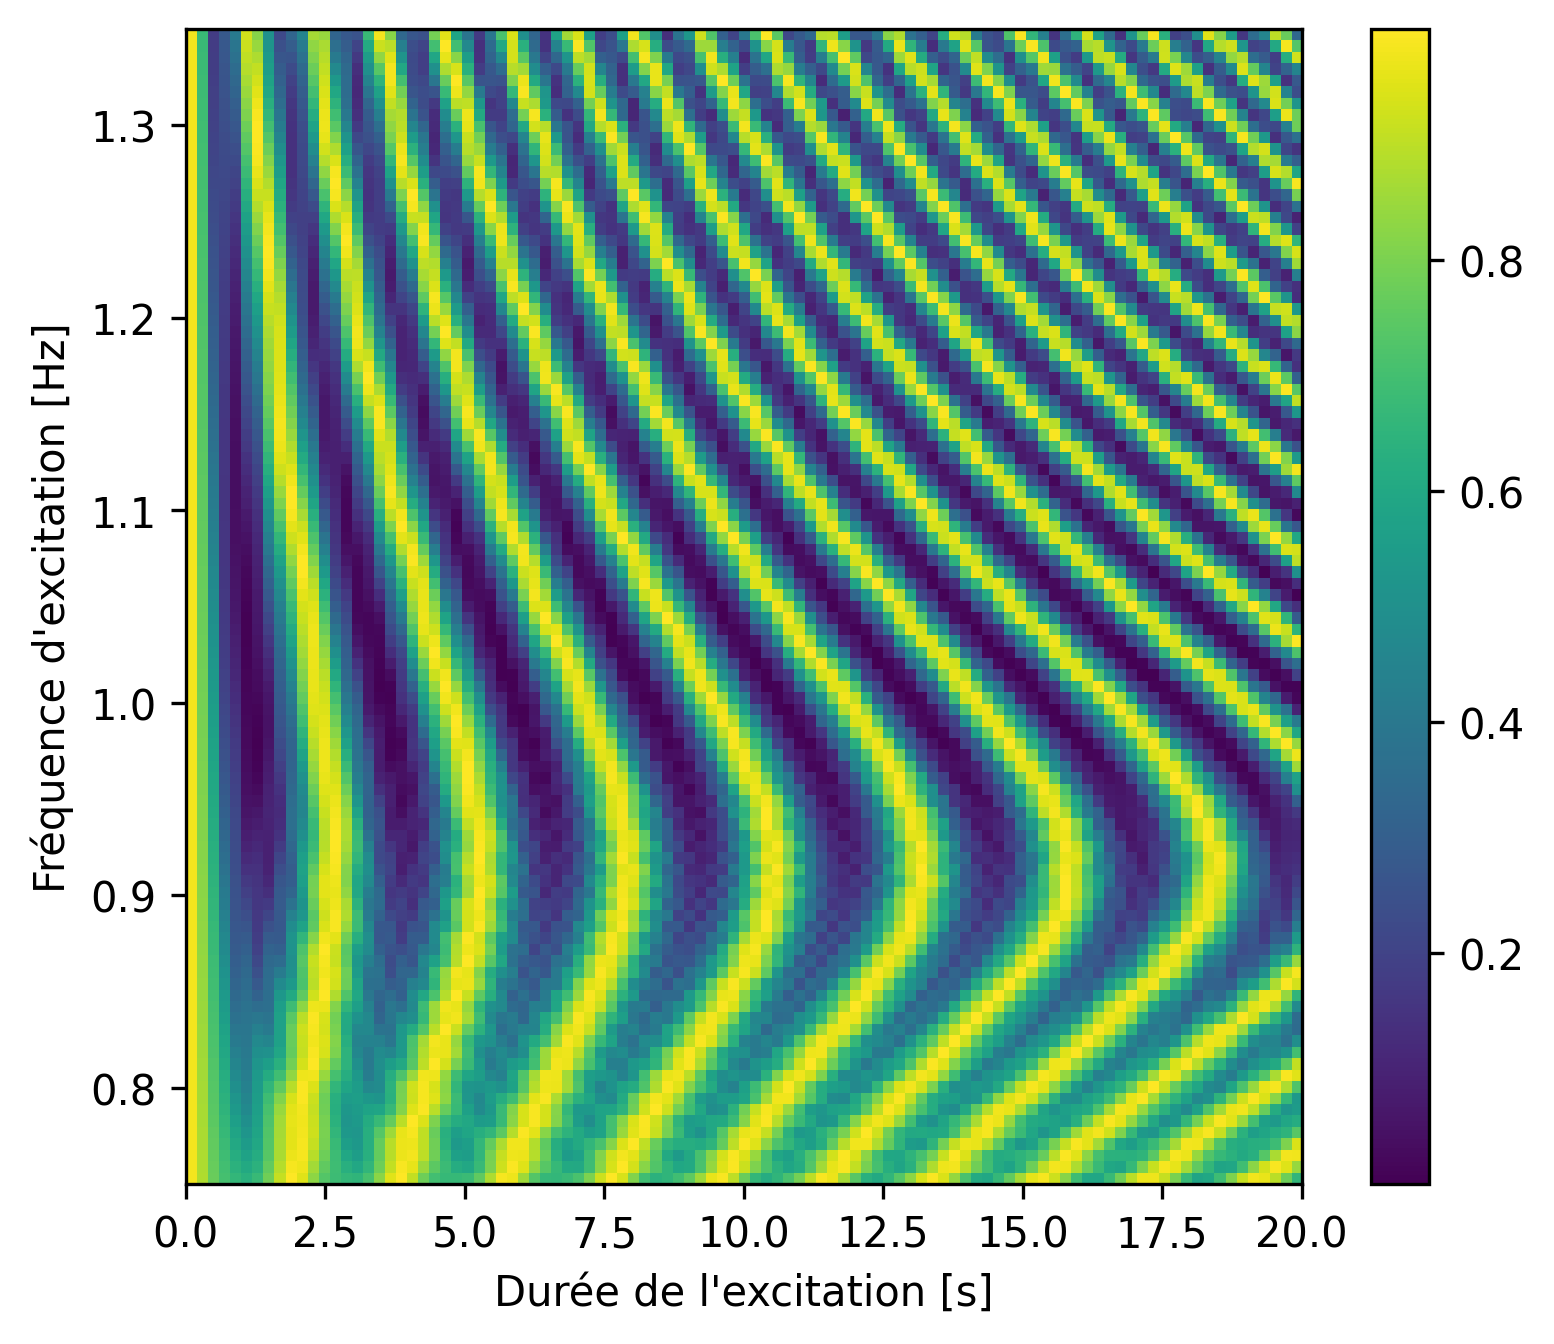

In [5]:
plt.figure(figsize=(6, 5), dpi = 300)
plt.imshow(RabiXY, origin = "lower", extent=[0, 20, 0.75, 1.35], aspect="auto")
plt.xlabel("Durée de l'excitation [s]")
plt.ylabel("Fréquence d'excitation [Hz]")
plt.colorbar()
plt.savefig("RabiXY_plt.png")
plt.show()

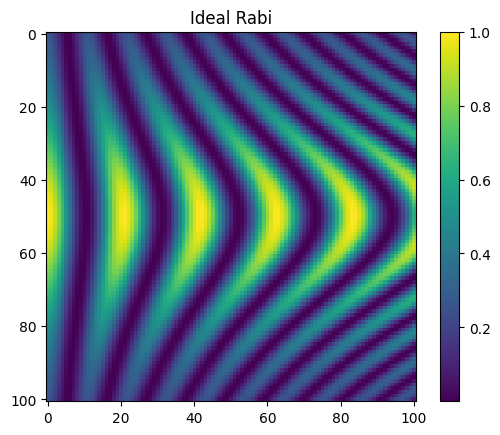

In [15]:
f_L_0 = 1.059

f_R_0 = f_L_0 / 4.423

def Theta_Max(delta, t):
    theta = np.zeros((len(delta), len(t)))
    for i in range(len(delta)):
        for j in range(len(t)):
            num = f_R_0**2
            den = f_R_0**2 + delta[i]**2
            W = np.sqrt( f_R_0**2 + delta[i]**2 ) / 2
            mod = np.cos(2 * np.pi * W * t[j])**2
            theta[i, j] = (num / den) * mod 
    return theta

delta = np.linspace(-0.4, 0.4, 101, endpoint=True)
t_burst = np.linspace(0, 20, 101, endpoint=True)
tab_freq = delta + f_L_0

y = Theta_Max(delta, t_burst)

plt.figure()
plt.imshow(y)
plt.colorbar()
plt.title("Ideal Rabi")


plt.show()

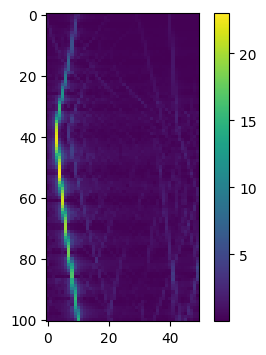

(101, 50)

In [16]:
#signal = y

signal = RabiX


n = int(len(signal) * 1)


fourier = np.fft.rfft(signal, n)

sample_rate = 10
freq_Benji = np.fft.rfftfreq(n, d=1/sample_rate)

fourier = np.delete(fourier, [0], axis=1)

plt.figure(figsize=[4 ,4])
plt.imshow(np.abs(fourier))
plt.colorbar()
plt.show()

A = np.abs(fourier)
A.shape

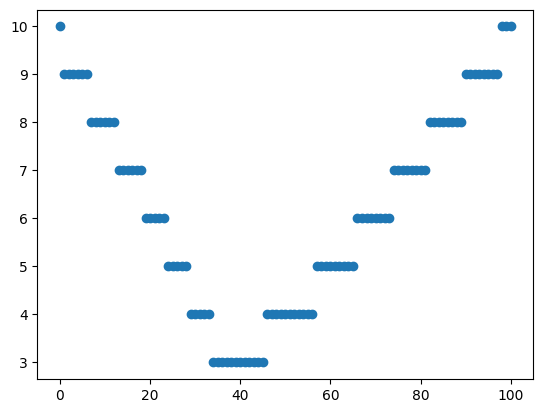

In [17]:
l = []
for k in range(101):
    A_rest = A[k, :]
    l.append(np.where(A_rest==np.max(A_rest))[0])

plt.figure()
plt.scatter(range(len(l)), l)

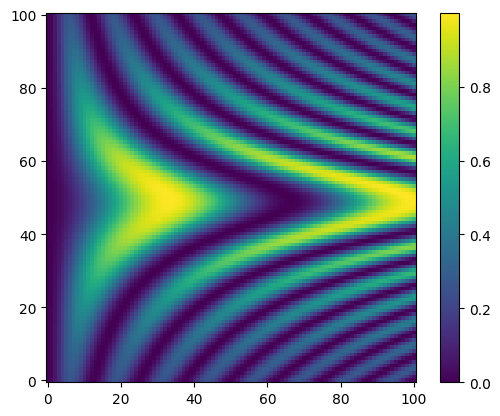

In [49]:
f_L_0 = 1.059

f_R_0 = f_L_0 / 4.423

p_psi = 0.000055 * 2 * np.pi * 50

A = 0.375 * 0.1 * 31.25 * 1e-3 / p_psi


def f_L(delta, t):
    return f_L_0 + delta * np.sinc(delta * t / np.pi)

def f_R(delta, t):
    return (( delta + f_L_0)**2) * A

def Theta_Test(delta, t):
    theta = np.zeros((len(delta), len(t)))
    for i in range(len(delta)):
        for j in range(len(t)):
            f_R_1 = f_R(delta[i], t[j])
            num = f_R_0**2
            den = f_R_0**2 + delta[i]**2
            W = np.sqrt( f_R_1**2 + delta[i]**2 ) / 2
            mod = np.sin(2 * np.pi * W * t[j])**2
            theta[i, j] = (num / den) * mod 
    return theta


y1 = Theta_Test(delta, t_burst)

plt.figure()
plt.imshow(y1, origin = "lower")
plt.colorbar()
plt.show()



plt.show()



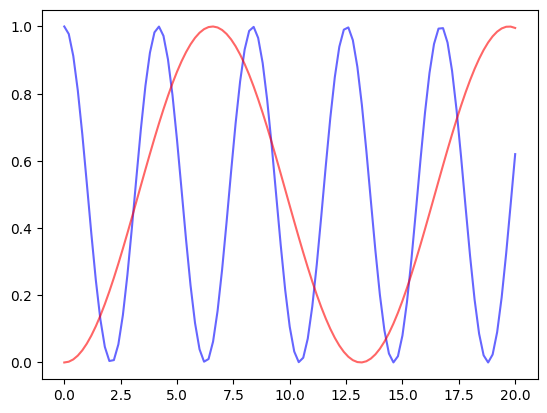

In [19]:
k = 50

#y_real = RabiX / np.pi

abs = y[k]
abs1 = y1[k, :]
#abs_real = y_real[k :]


plt.plot(t_burst, abs, 'b', alpha=0.6)
plt.plot(t_burst, abs1, 'r', alpha=0.6)
#plt.plot(abs_real, 'k', alpha=0.6)

plt.show()


0.23881132981683903 0.0007615647148798288
0.23943025096088627


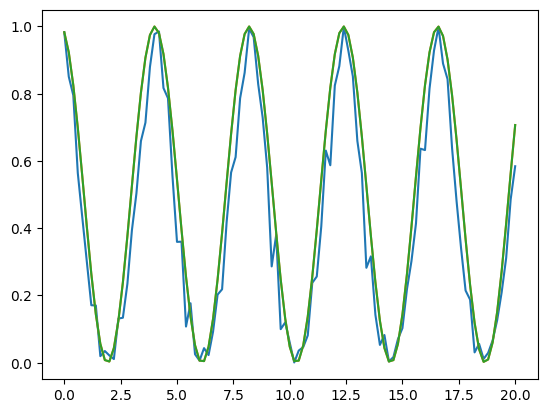

In [20]:
P = RabiX[50, :]


def Modele(t, f, p):
    return (1 + np.cos(2 * np.pi * f * t + p)) / 2

from scipy.optimize import curve_fit

tab, pcov = curve_fit(Modele, t_burst, P, p0 = [f_R_0, 0])

plt.plot(t_burst, P)
plt.plot(t_burst, Modele(t_burst, *tab))


plt.plot(t_burst, Modele(t_burst, *tab))

print(tab[0], np.sqrt(pcov[0,0]))
print(f_R_0)

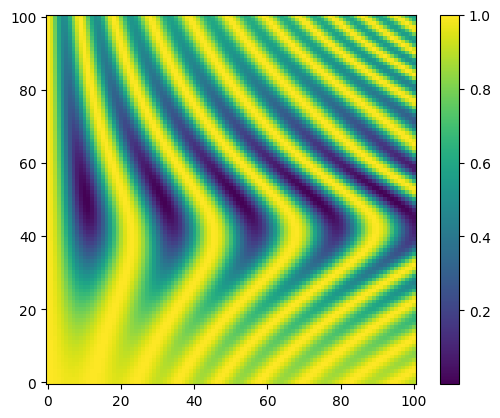

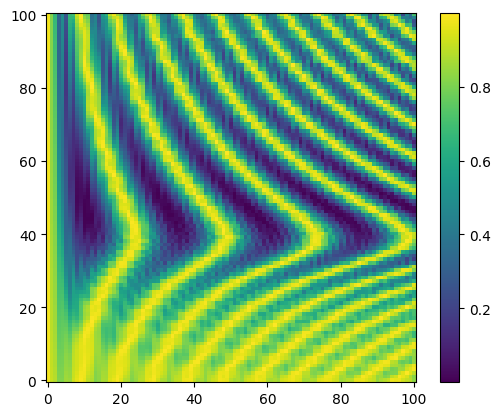

In [65]:



def f_R_test(delta, t):
    #return (1 * f_R_0) * ( (1 + delta / f_L_0)**2 ) # * np.cos(delta * t)
    return f_R_0 * (  1 + delta * (1 +  np.sinc(delta * t / np.pi)) / f_L_0  )

def bricole_freq(delta, t):
    f_L_new = f_L_0 + delta * np.sinc(delta * t / np.pi)
    f_R_new = f_R_0 * (  1 + delta * (1 +  np.sinc(delta * t / np.pi)) / f_L_0  )
    
    #return np.sqrt( f_R_0**2 + delta**2 ) / 2
    
    #www = f_R_test(delta, t) / 2
    www = f_R_new
    return np.sqrt( www**2 + delta**2 ) / 2

def Theta_svp(delta, t):
    theta = np.zeros((len(delta), len(t)))
    for i in range(len(delta)):
        for j in range(len(t)):
            f_R_1 = f_R_test(delta[i], t[j])
            num = f_R_1**2
            den = f_R_1**2 + delta[i]**2
            W = bricole_freq(delta[i], t[j])
            mod = np.sin(2 * np.pi * W * t[j])**2
            theta[i, j] = (num / den) * mod 
    return theta


y_svp = Theta_svp(delta, t_burst)

plt.figure()
plt.imshow(1-y_svp, origin = "lower")
plt.colorbar()
plt.show()


plt.figure()
plt.imshow(RabiX, origin = "lower")
plt.colorbar()


plt.show()

In [81]:
def chi(d, t):
    return d*np.sinc(d*t) * t
def chi2(d, t):
    return chi(d, t)*(1 - t ** 3) * t

In [82]:
x = np.linspace(0, 20, 100)
y = np.linspace(0.75, 1.35, 100)
xv, yv = np.meshgrid(x, y, sparse=True)
z = chi(xv, yv)
z2 = np.cos(chi2(xv, yv))

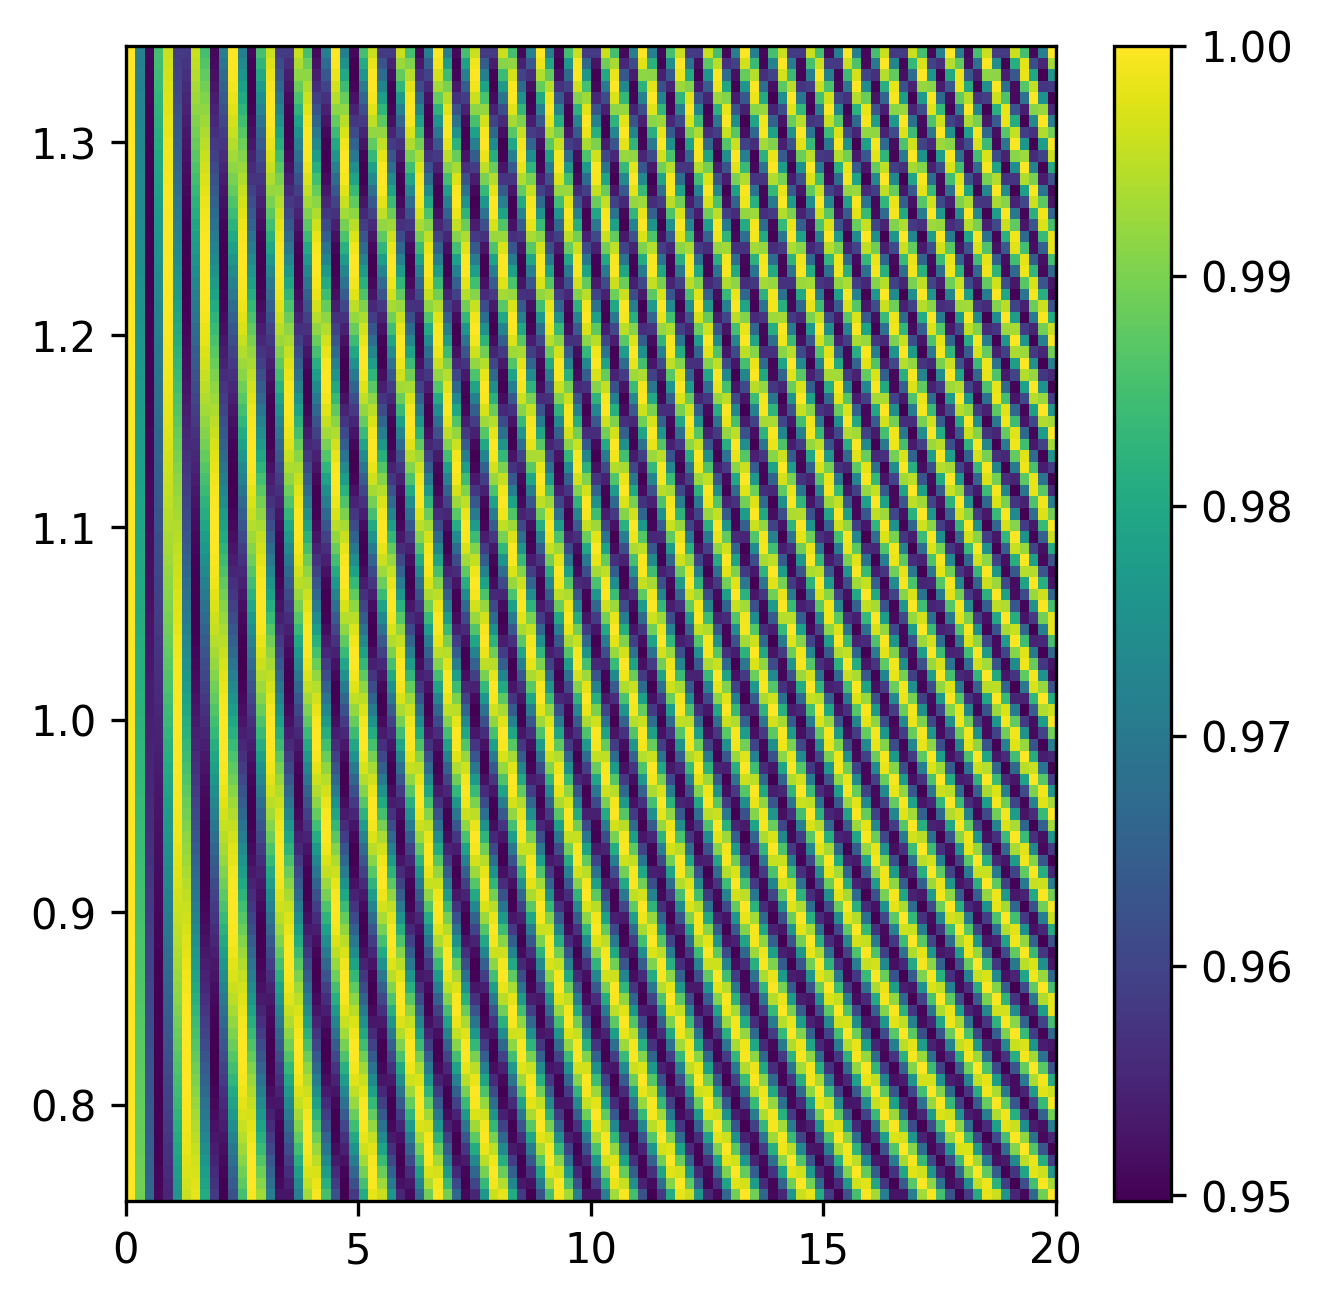

In [83]:
plt.figure(figsize=(5, 5), dpi = 300)
plt.imshow(np.cos(z), origin = "lower", extent=[0, 20, 0.75, 1.35], aspect="auto")
plt.colorbar()

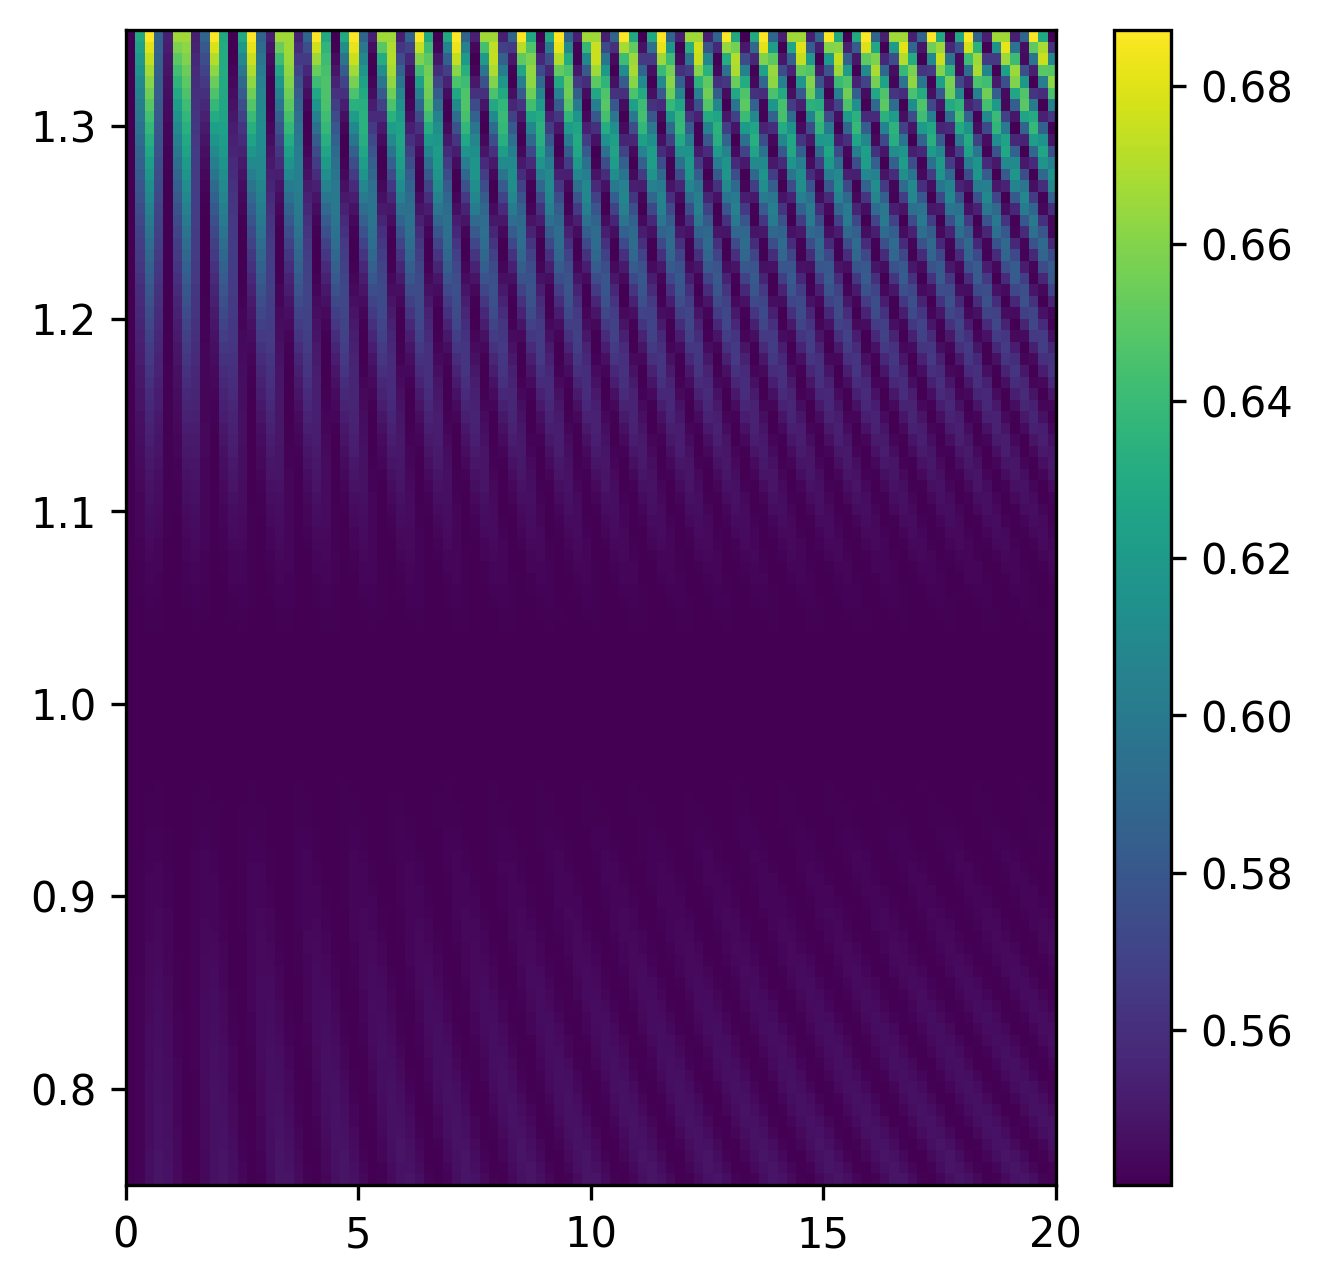

In [80]:
plt.figure(figsize=(5, 5), dpi = 300)
plt.imshow(np.cos(z2), origin = "lower", extent=[0, 20, 0.75, 1.35], aspect="auto")
plt.colorbar()